# 와인 감별사 : 와인의 Quality를 분류하는 Classifier 만들기

## 1. 과제 설명
이번 과제에서는 케라스(Keras)를 활용하여, 와인의 품질을 분류하는 인공신경망 분류기를 만들어 볼 것입니다.
케라스는 Tensorflow, Theano 등의 딥 러닝 라이브러리 위에서 동작하는 오픈 소스 라이브러리로, 보다 쉬운 API를 제공함으로써 모델 설계 및 학습, 테스트가 간단하다는 장점이 있습니다. 

### 1.1 케라스 설치를 위한 필수 라이브러리
케라스를 설치하기 전에 먼저 필수적으로 설치해야 할 것들이 있습니다.
* Anaconda : Python 3.x 버전, Numpy, Pandas, SciPy, sklearn 등 필수 라이브러리들이 포함된 통합 배포 팩
<br> 아나콘다 설치 : https://www.anaconda.com/distribution/#download-section
* Tensorflow : Google에서 개발한 오픈 소스 딥 러닝 라이브러리. <b>설치된 Python 버전과 호환되는 것으로 설치할것!</b>
<br> 텐서플로우 설치 : https://www.tensorflow.org/install/pip
<br> * CPU 버전을 설치할 것을 권장. 

### 1.2 케라스 설치
위 라이브러리들을 설치한 후, 케라스를 설치합니다.
* https://keras.io/#installation

### 1.3 케라스 설치 확인
케라스가 올바르게 설치되었는지 확인하기 위해, 케라스를 Import한 뒤 버전을 출력해봅니다.


In [1]:
import tensorflow as tf
from tensorflow import keras

keras.__version__

'2.4.0'

위와 같이 케라스의 버전이 출력되면 정상입니다. (출력되는 버전은 위 예시와 다를 수도 있음)<br> 나중에 신경망을 만들기 위한 클래스들도 함께 Import 합시다.

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation

---
## 2. Data Set 설명
 본 과제에서 사용할 데이터 셋은 UCI에서 제공되는 Wine Quality Data Set입니다. (https://archive.ics.uci.edu/ml/datasets/Wine+Quality) 데이터는 레드 와인 1599개, 화이트 와인 4898개의 화학적 특성을 포함하고 있습니다. 데이터는 두 개의 CSV(Comma-seperated values)형태로 제공되며, 구성은 다음과 같습니다.
* 화이트 와인 / 레드 와인 CSV 파일
* 11개의 실수(Real) 입력 변수 (X)
    * fixed acidity
    * volatile acidity
    * citric acid
    * residual sugar
    * chlorides
    * free sulfur dioxide
    * total sulfur dioxide
    * density
    * pH
    * sulphates
    * alcohol
* 1개의 클래스 레이블 (Y)
   * quality (0~10, 0: Very poor, 10: Very excellent)
* Missing Value 없음
* 클래스들이 불균등하게 분포함.

더 자세한 사항은 블랙보드에 함께 올라가있는 설명 파일을 참고하도록 합시다.

### 2.1 데이터 로드
데이터 분석에서 가장 많이 사용되는 라이브러리 중 하나인 Pandas와 Numpy를 Import하겠습니다. Pandas는 데이터 분석에 유용한 데이터 타입인 DataFrame을 제공하며, Numpy는 효율적이고 빠른 매트릭스 연산을 지원합니다.

In [3]:
import pandas as pd
pd.__version__
pd.options.display.max_rows=15

In [4]:
import numpy as np
np.__version__

'1.19.2'

Pandas를 이용해서 CSV 파일을 읽어들이도록 합시다. white_wine 변수에는 화이트 와인 데이터를, red_wine 변수에는 레드 와인 데이터를 읽어들입니다.

In [5]:
#########################코드########################

white_wine = pd.read_csv('winequality-white.csv')
red_wine = pd.read_csv('winequality-red.csv')

#####################################################

### 2.2 데이터 전처리
데이터를 읽어들인 뒤, 읽어들인 데이터프레임을 display 함수를 통해 확인합니다.

In [6]:
display(white_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [9]:
display(red_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


이제 데이터프레임을 입력 변수와 정답 셋(클래스 레이블)으로 나누는 함수를 작성하겠습니다.<br>
<b>generate_data</b>함수는 데이터프레임 객체와 테스트 셋 비율을 입력으로 받아, 네 개의 numpy array를 반환합니다. 트레이닝 셋과 테스트 셋의 비율은 training_set_ratio에 의해 결정됩니다.
* Function : generate_data
 * 입력
     * pd.DataFrame : df
     * double : training_set_ratio  
 * 출력
     * np.array : X_train
     * np.array : Y_train
     * np.array : X_test
     * np.array : Y_test
     


In [10]:
#####################################################
from sklearn.model_selection import train_test_split
def generate_data(df, t_r):

    
    Y=df.iloc[:,-1]
    X=df.iloc[:,:-1]
    Y=Y.values
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=t_r, random_state=321)



    return X_train.values, Y_train, X_test.values, Y_test
#####################################################

In [11]:
x_train, y_train, x_test, y_test = generate_data(white_wine, 0.7)

작성한 함수를 호출하여 화이트 와인 데이터에 대해 트레이닝 셋과 테스트 셋의 입력과 정답이 적절하게 생성되었는지 확인합니다.

---

# 3. 케라스를 이용한 모델 생성, 학습, 테스트
입력 데이터와 정답 셋이 만들어졌으니 케라스를 사용하여 각 데이터에 대한 분류기를 생성하고, 트레이닝 셋으로 학습시킨 뒤 테스트 정확도를 관찰합니다.

# 과제
### 1. 화이트 와인 분류 모델과 레드 와인 분류 모델 설계 및 학습
* 하나의 히든 레이어에 32개의 노드를 가진 인공신경망 모델 생성 및 모델 학습
* 트레이닝 Epoch에 따라 Loss의 변화를 그래프로 시각화
* 테스트 셋에 대한 정확도 기록

Epoch 1/5
46/46 [==============================] - 0s 579us/step - loss: 2.7357 - accuracy: 0.2616
Epoch 2/5
46/46 [==============================] - 0s 570us/step - loss: 1.6527 - accuracy: 0.3009
Epoch 3/5
46/46 [==============================] - 0s 548us/step - loss: 1.3558 - accuracy: 0.4792
Epoch 4/5
46/46 [==============================] - 0s 635us/step - loss: 1.3396 - accuracy: 0.4589
Epoch 5/5
46/46 [==============================] - 0s 530us/step - loss: 1.3019 - accuracy: 0.4742


/Users/shin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/shin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/shin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/shin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/shin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/shin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/

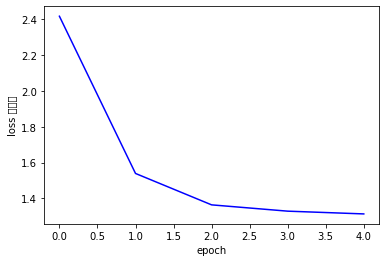

108/108 - 0s - loss: 1.3020 - accuracy: 0.4514


[1.302018642425537, 0.4514435827732086]

In [12]:
##########################################################

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt


model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, activation='tanh'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

result = model.fit(x_train, y_train, epochs=5)

plt.plot(result.history['loss'],label='loss',color='blue')
plt.xlabel('epoch')
plt.ylabel('loss 정확도')
plt.show()


model.evaluate(x_test,  y_test, verbose=2)


###########################################################

### 2. 각 모델의 성능을 향상시킬 수 있는 방법 적용
* 하이퍼파라미터를 변경하여 테스트 셋에서의 정확도를 향상시킬 것
    * 예) 레이어 수, 노드 수, Learning rate 등
* 하이퍼파라미터를 변화시킨 각각의 모델에 대해, 트레이닝 Epoch 당 Loss의 변화를 기록하고 이를 시각화
* 그 외 성능을 향상시킬 수 있는 모든 방법을 사용하여 가장 성능이 좋은 모델을 선택
    * 예) Dropout, Normalization 등

Epoch 1/5
46/46 [==============================] - 0s 714us/step - loss: 2.6869 - accuracy: 0.1514
Epoch 2/5
46/46 [==============================] - 0s 659us/step - loss: 1.3848 - accuracy: 0.4593
Epoch 3/5
46/46 [==============================] - 0s 597us/step - loss: 1.2902 - accuracy: 0.4702
Epoch 4/5
46/46 [==============================] - 0s 729us/step - loss: 1.3227 - accuracy: 0.4419
Epoch 5/5
46/46 [==============================] - 0s 682us/step - loss: 1.2399 - accuracy: 0.4818


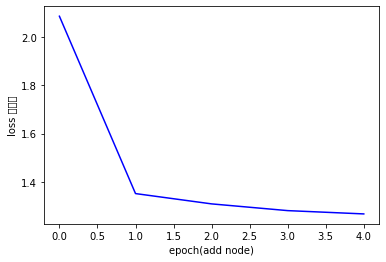

108/108 - 0s - loss: 1.2612 - accuracy: 0.4369
Epoch 1/5
46/46 [==============================] - 0s 632us/step - loss: 1.8105 - accuracy: 0.3118
Epoch 2/5
46/46 [==============================] - 0s 601us/step - loss: 1.2940 - accuracy: 0.4612
Epoch 3/5
46/46 [==============================] - 0s 663us/step - loss: 1.2733 - accuracy: 0.4405
Epoch 4/5
46/46 [==============================] - 0s 713us/step - loss: 1.2591 - accuracy: 0.4607
Epoch 5/5
46/46 [==============================] - 0s 731us/step - loss: 1.2416 - accuracy: 0.4543


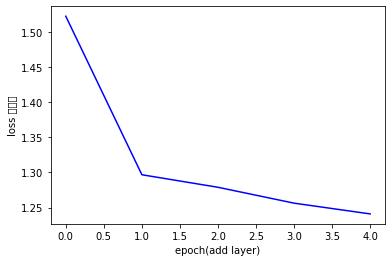

108/108 - 0s - loss: 1.2530 - accuracy: 0.4401
Epoch 1/5
123/123 [==============================] - 0s 518us/step - loss: 1.3058 - accuracy: 0.4541
Epoch 2/5
123/123 [==============================] - 0s 537us/step - loss: 1.2944 - accuracy: 0.4546
Epoch 3/5
123/123 [==============================] - 0s 515us/step - loss: 1.2699 - accuracy: 0.4525
Epoch 4/5
123/123 [==============================] - 0s 511us/step - loss: 1.2487 - accuracy: 0.4553
Epoch 5/5
123/123 [==============================] - 0s 500us/step - loss: 1.2347 - accuracy: 0.4584


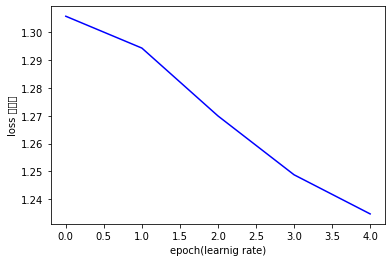

31/31 - 0s - loss: 1.1759 - accuracy: 0.4714
Epoch 1/5
123/123 [==============================] - 0s 554us/step - loss: 2.1097 - accuracy: 0.2116
Epoch 2/5
123/123 [==============================] - 0s 511us/step - loss: 1.4307 - accuracy: 0.3892
Epoch 3/5
123/123 [==============================] - 0s 509us/step - loss: 1.4011 - accuracy: 0.3946
Epoch 4/5
123/123 [==============================] - 0s 517us/step - loss: 1.4090 - accuracy: 0.3942
Epoch 5/5
123/123 [==============================] - 0s 527us/step - loss: 1.3568 - accuracy: 0.4226


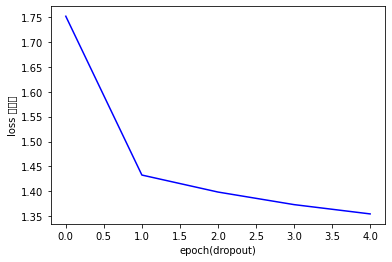

31/31 - 0s - loss: 1.2333 - accuracy: 0.4704
Epoch 1/5
123/123 [==============================] - 0s 677us/step - loss: 1.8092 - accuracy: 0.3774
Epoch 2/5
123/123 [==============================] - 0s 627us/step - loss: 1.1524 - accuracy: 0.5128
Epoch 3/5
123/123 [==============================] - 0s 648us/step - loss: 1.1101 - accuracy: 0.5238
Epoch 4/5
123/123 [==============================] - 0s 684us/step - loss: 1.1265 - accuracy: 0.5152
Epoch 5/5
123/123 [==============================] - 0s 734us/step - loss: 1.0755 - accuracy: 0.5438


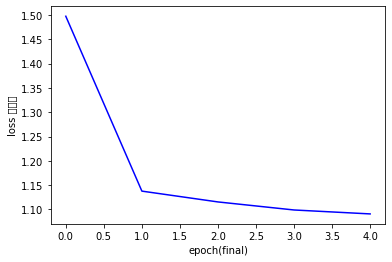

31/31 - 0s - loss: 1.0246 - accuracy: 0.5643


[1.0246038436889648, 0.5642856955528259]

In [13]:
##########################################################


##node 추가
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='tanh'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

result = model2.fit(x_train, y_train, epochs=5)

plt.plot(result.history['loss'],label='loss',color='blue')
plt.xlabel('epoch(add node)')
plt.ylabel('loss 정확도')
plt.show()


model2.evaluate(x_test,  y_test, verbose=2)


##Layer추가
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, activation='tanh'),
  tf.keras.layers.Dense(64, activation='tanh'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

result = model3.fit(x_train, y_train, epochs=5)

plt.plot(result.history['loss'],label='loss',color='blue')
plt.xlabel('epoch(add layer)')
plt.ylabel('loss 정확도')
plt.show()


model3.evaluate(x_test,  y_test, verbose=2)


##train, test 비율 조정
x_train, y_train, x_test, y_test = generate_data(white_wine, 0.2)

result = model.fit(x_train, y_train, epochs=5)

plt.plot(result.history['loss'],label='loss',color='blue')
plt.xlabel('epoch(learnig rate)')
plt.ylabel('loss 정확도')
plt.show()


model.evaluate(x_test,  y_test, verbose=2)


##Dropout
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, activation='tanh'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

result = model4.fit(x_train, y_train, epochs=5)

plt.plot(result.history['loss'],label='loss',color='blue')
plt.xlabel('epoch(dropout)')
plt.ylabel('loss 정확도')
plt.show()


model4.evaluate(x_test,  y_test, verbose=2)

##final
##train 정규화
AVG=[0,0,0,0,0,0,0,0,0,0,0]
for i in x_train:
    for j in range(0,11):
        AVG[j]+=i[j]
for j in range(0,11):
    AVG[j]/=len(x_train)
STDEV=[0,0,0,0,0,0,0,0,0,0,0]
for i in x_train:
    for j in range(0,11):
        STDEV[j]+=(i[j]-AVG[j])**2
for j in range(0,11):
    STDEV[j]=(STDEV[j]/(len(x_train)-1))**0.5
for i in x_train:
        for j in range(0,11):
            i[j]=(i[j]-AVG[j])/STDEV[j]
##test 정규화
AVG=[0,0,0,0,0,0,0,0,0,0,0]
for i in x_test:
    for j in range(0,11):
        AVG[j]+=i[j]
for j in range(0,11):
    AVG[j]/=len(x_test)
STDEV=[0,0,0,0,0,0,0,0,0,0,0]
for i in x_test:
    for j in range(0,11):
        STDEV[j]+=(i[j]-AVG[j])**2
for j in range(0,11):
    STDEV[j]=(STDEV[j]/(len(x_test)-1))**0.5
for i in x_test:
        for j in range(0,11):
            i[j]=(i[j]-AVG[j])/STDEV[j]


model_final = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, activation='tanh'),
  tf.keras.layers.Dense(128, activation='tanh'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='tanh'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_final.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

result = model_final.fit(x_train, y_train, epochs=5)

plt.plot(result.history['loss'],label='loss',color='blue')
plt.xlabel('epoch(final)')
plt.ylabel('loss 정확도')
plt.show()


model_final.evaluate(x_test,  y_test, verbose=2)


###########################################################

### 3. 화이트 와인과 레드 와인을 하나의 모델만 사용하여 분류
* 화이트 와인과 레드 와인 데이터를 합쳐 wine 데이터 셋 생성
* 입력이 화이트 와인인지 레드 와인인지에 관계없이 와인 품질을 분류하는 모델 생성
* 모델의 성능을 향상시킬 수 있는 방법을 찾아 적용할 것


Epoch 1/5
163/163 [==============================] - 0s 704us/step - loss: 1.0787 - accuracy: 0.5457
Epoch 2/5
163/163 [==============================] - 0s 690us/step - loss: 1.0635 - accuracy: 0.5401
Epoch 3/5
163/163 [==============================] - 0s 688us/step - loss: 1.0511 - accuracy: 0.5495
Epoch 4/5
163/163 [==============================] - 0s 686us/step - loss: 1.0453 - accuracy: 0.5540
Epoch 5/5
163/163 [==============================] - 0s 693us/step - loss: 1.0319 - accuracy: 0.5651


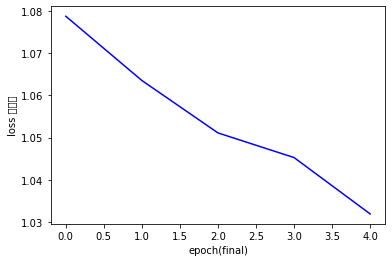

41/41 - 0s - loss: 1.0298 - accuracy: 0.5515


[1.0298466682434082, 0.5515384674072266]

In [29]:
##########################################################


wine=pd.concat([red_wine,white_wine])

x_train, y_train, x_test, y_test = generate_data(wine, 0.2)

AVG=[0,0,0,0,0,0,0,0,0,0,0]
for i in x_train:
    for j in range(0,11):
        AVG[j]+=i[j]
for j in range(0,11):
    AVG[j]/=len(x_train)
STDEV=[0,0,0,0,0,0,0,0,0,0,0]
for i in x_train:
    for j in range(0,11):
        STDEV[j]+=(i[j]-AVG[j])**2
for j in range(0,11):
    STDEV[j]=(STDEV[j]/(len(x_train)-1))**0.5
for i in x_train:
        for j in range(0,11):
            i[j]=(i[j]-AVG[j])/STDEV[j]
##test 정규화
AVG=[0,0,0,0,0,0,0,0,0,0,0]
for i in x_test:
    for j in range(0,11):
        AVG[j]+=i[j]
for j in range(0,11):
    AVG[j]/=len(x_test)
STDEV=[0,0,0,0,0,0,0,0,0,0,0]
for i in x_test:
    for j in range(0,11):
        STDEV[j]+=(i[j]-AVG[j])**2
for j in range(0,11):
    STDEV[j]=(STDEV[j]/(len(x_test)-1))**0.5
for i in x_test:
        for j in range(0,11):
            i[j]=(i[j]-AVG[j])/STDEV[j]


result = model_final.fit(x_train, y_train, epochs=5)

plt.plot(result.history['loss'],label='loss',color='blue')
plt.xlabel('epoch(final)')
plt.ylabel('loss 정확도')
plt.show()


model_final.evaluate(x_test,  y_test, verbose=2)


###########################################################